# An Introduction to Keras

[Keras](https://keras.io/) is a commonly-used API to TensorFlow. Here, we use Keras to perform image classification on the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) (see also [Wikipedia's MNIST entry](https://en.wikipedia.org/wiki/MNIST_database)).

This example is taken from [*Deep Learning with Python*](https://github.com/fchollet/deep-learning-with-python-notebooks), F. Chollet, 2018, Section 2.1. 

In [27]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

The MNIST dataset contains 70K images split between a training set and a testing set. The inputs are 28x28-pixel images of hand-written digits; the outputs are digit labels.

training images         
	count: 60000         
	shape: (60000, 28, 28)         
	image data type: uint8         
	label data type: uint8
 testing images         
	count: 10000         
	shape: (10000, 28, 28)
 example:         
	pixel value: 166         
	label value: 5
 example image:


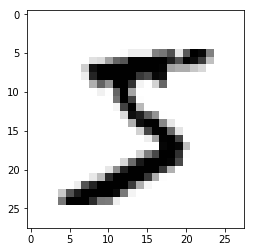

In [28]:
print(
    f'training images \
        \n\tcount: {len(train_labels)} \
        \n\tshape: {train_images.shape} \
        \n\timage data type: {train_images.dtype} \
        \n\tlabel data type: {train_labels.dtype}\n',
    f'testing images \
        \n\tcount: {len(test_labels)} \
        \n\tshape: {test_images.shape}\n',
    f'example: \
        \n\tpixel value: {train_images[0,5,20]} \
        \n\tlabel value: {train_labels[0]}\n',
    'example image:'
)

import matplotlib.pyplot as plt
%matplotlib inline

digit_image = train_images[0]
plt.imshow(digit_image, cmap=plt.cm.binary)

Neural networks require numeric representations.

In [29]:
from keras.utils import to_categorical

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') /255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Build and configure the neural model.



In [30]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Train the model.

In [31]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.2555 - acc: 0.9258
Epoch 2/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.1046 - acc: 0.9697
Epoch 3/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.0691 - acc: 0.9794
Epoch 4/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.0500 - acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.0371 - acc: 0.9890


Test the model.

In [32]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 40us/step
test_acc: 0.9767
